# BM 336027 - Technion - Medical Image Processing


## Homework 1 - Image Histograms & Filters 
---

### <a style='color:red'> Due Date: 23.4.2022 </a>

---
###  Agenda

* [Exercise 0: Color Conversion](#Exercise-0)
* [Exercise 1: Histogram Equalization](#Exercise-1)
* [Exercise 2: Convolution & Filters](#Exercise-2)
* [Exercise 3: Bilateral Filter](#Exercise-3)

#### Use as many cells as you need

---
### Students Information

* Fill in


|           Name |          Id |                               email |
|----------------|-------------|------------------------------------ |
|  [Daria Hasin] | [316398551] | [daria.hasin@campus.technion.ac.il] |


---
### Submission Guidelines

* **No handwritten submissions.** 
* What you have to submit:
    * You should submit this file only, with the name: `bm_hw1_id.ipynb`.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* When writing code, please follow PEP 8.

---

In [1]:
# imports you will need
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

---

### **Assignment Instructions**
**In this assignment, you are allowed to use only basic numpy and matplotlib functions, and functions you implemented in other sections of the exercises**

---

###  Exercise 0

In this exercise, we want to convert an RGB image to a grayscale image. 

1. Implement the function `RGB2GRAY_mean` that takes in a three-channel RGB image in the form of a numpy array and returns a grayscale image which is the average value of the three channels (red, green, and blue) <br>
    Ensure that your function can be configured with channels first (3, H, W) or last (H, W, 3). <br>
    Write a description of your function and explain its inputs and output

In [2]:
def RGB2GRAY_mean(img: np.ndarray) -> np.ndarray:
    '''
    The function takes in a three-channel RGB image and returns a grayscale 
    image which is the average value of the three channels.
    
    :param img: numpy array of RGB image
    :return img_gray: numpy array of mean grayscale image
    '''
    # ====== YOUR CODE: ======
    if img.shape[2] == 3:
        img_gray = img.mean(axis=2)
    elif img.shape[0] == 3:
        img_gray = img.mean(axis=0)
    else:
        print("not RGB image")
        img_gray = np.copy(img)
    # ========================
    return img_gray

2. Averaging all the channels may not be the best way to apply this conversion. A more "human-oriented" way is taking the weighted average of the three channels according to the following equation:
$$ Y = 0.2125\cdot R + 0.7154\cdot G + 0.0721\cdot B $$
    look [here](https://www.baeldung.com/cs/convert-rgb-to-grayscale) for more information. <br>
    
    Implement the function `RGB2GRAY_weighted` that takes in a three-channel RGB image in the form of a numpy array and returns a grayscale image according to the above equation.<br>
    Ensure that your function can be configured with channels first (3, H, W) or last (H, W, 3). <br>
    Write a description of your function and explain its inputs and output.

In [3]:
def RGB2GRAY_weighted(img: np.ndarray) -> np.ndarray:
    '''
    The function takes in a three-channel RGB image and returns a grayscale 
    image according to the equation: Y = 0.2125*Red + 0.7154*Green + 0.0721*Blue.
    
    :param img: numpy array of RGB image
    :return img_gray: numpy array of weighted grayscale image
    '''
    # ====== YOUR CODE: ======
    if img.shape[2] == 3:
        r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]

    elif img.shape[0] == 3:
        r, g, b = img[0,:,:], img[1,:,:], img[2,:,:]

    else:
        print("not RGB image")
        return img
    
    img_gray = 0.2125 * r + 0.7154 * g + 0.0721 * b
    # ========================
    return img_gray
    

3. Load the colored image 'retina.jpg' and convert it to grayscale using the above two functions you implemented.<br>
    Display the colored image and the two grayscaled images in one figure and add titles.

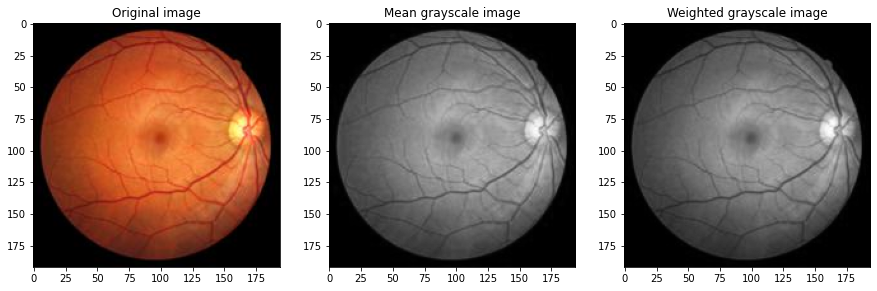

In [4]:
# ====== YOUR CODE: ======
os.chdir('images')
plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
rgb_img = plt.imread('retina.jpg')
plt.title('Original image')
plt.imshow(rgb_img)

plt.subplot(1,3,2)
mean_gs_img = RGB2GRAY_mean(rgb_img)
plt.title('Mean grayscale image')
plt.imshow(mean_gs_img, cmap='gray')

plt.subplot(1,3,3)
weighted_gs_img = RGB2GRAY_weighted(rgb_img)
plt.title('Weighted grayscale image')
plt.imshow(weighted_gs_img, cmap='gray')

plt.show()
# ========================

---

### Exercise 1


In many cases, you might get images that do not utilize the entire range of pixel values. <br> 
In these cases, the images will look too dim or too bright.   

First, we will implement a function that calculate the histogram of the image.<br>
**Do not** use the function plt.hist() in this exersice.<br>

1. Implement the function `ImHist_trivial` that receives an image as a uint8 numpy array and returns its histogram. Calcultat the histogram in the trivial way; going over the gray values and count them in the image.

    Write a description of your function and explain its inputs and output.

In [5]:
def ImHist_trivial(img: np.ndarray)-> np.ndarray:
    
    '''
    The function takes in an image and returns its histogram.
    
    :param img: numpy array of an image
    :return hist: numpy array with 256 cells, each cell indicats the num of pixels with its value (0-255).
    '''
        
    # ====== YOUR CODE: ======
    hist = np.zeros(256)
    
    for gs in range(256):
        for row in img:
            for cell in row:
                if cell == gs:
                    hist[cell] +=1
    # ========================
    
    return hist

2. What is the computational complexity of the above function? 

**Answer:**

The computational complexity of the above function is $O((m\times n)^{256})$, while $m\times n$ is the image size and we are going over it 256 times (grayscale values).

3. Implement the function `ImHist_advanced` that receives an image as a uint8 numpy array and returns its histogram. This time, calculate the histogram such the computational complexity is lower. Think of a way that you go over the image just once. 

In [6]:
def ImHist_advanced(img: np.ndarray)-> np.ndarray:
    
    '''
    The function takes in an image and returns its histogram.
    
    :param img: uint8 numpy array of an image
    :return hist: numpy array with 256 cells, each cell indicats the num of pixels with its value (0-255).
    '''
        
    # ====== YOUR CODE: ======
    hist = np.zeros(256)
    for row in img:
        for cell in row:
            hist[cell] +=1
    # ========================
    
    return hist

4. What is the computational complexity of the above function? 

**Answer:**

The computational complexity of the above function is $O((m\times n)^2)$, while $m\times n$ is the image size and we are going over it once.

5. Load the image 'chest.jpg'. Measure the execution time of the functions `ImHist_trivial` and `ImHist_advanced` on that image.

In [7]:
# ====== YOUR CODE: ======
chest_img = plt.imread('chest.jpg')

%timeit ImHist_trivial(chest_img)
%timeit ImHist_advanced(chest_img)

# ========================

1min 40s ± 18.5 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
101 ms ± 1.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


6. Get the histogram of the chest image using one of the function you implemented. Display the image and its histogram. 
    Add titles to the figures and labels where is needed. <br> 

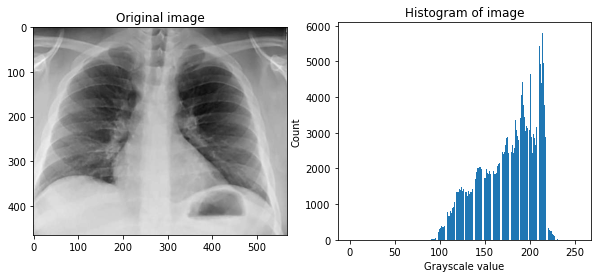

In [8]:
# ====== YOUR CODE: ======
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(chest_img, cmap='gray')
plt.title('Original image')

plt.subplot(1,2,2)
hist_arr = ImHist_advanced(chest_img)
plt.bar(range(256), hist_arr)
plt.title('Histogram of image')
plt.xlabel('Grayscale value')
plt.ylabel('Count')

plt.show()
# ========================

7. Implement the funciton `hist_eq` that receives an image as a uint8 numpy array and performs histogram equalization on that image. The output image's data type has to be uint8 as well.  <br>
     Write a description of your function and explain its inputs and output.

In [9]:
def HistEq(img: np.ndarray) -> np.ndarray:
    '''
    The function takes in an image and performs histogram equalization on that image.
    
    :param img: uint8 numpy array of an image
    :returm eq_img: uint8 numpy array with 256 cells, each cell indicats the num of pixels 
                     with its value (0-255) after histogram equalization.
    '''  
        
    # ====== YOUR CODE: ======
    hist_arr = ImHist_advanced(img)
    norm_hist = hist_arr/img.size
    com_norm_hist = np.array([np.sum(norm_hist[:idx+1]) for idx in range(len(norm_hist))])
    lut = ((len(com_norm_hist)-1)*com_norm_hist).astype('uint8')
    eq_img = lut[img]
    # ========================
    
    return eq_img

8. Apply histogram equalization on the chest image using the function `hist_eq` and display the transformed image and its histogram.<br>
    Add titles to the figures and labels where is needed.

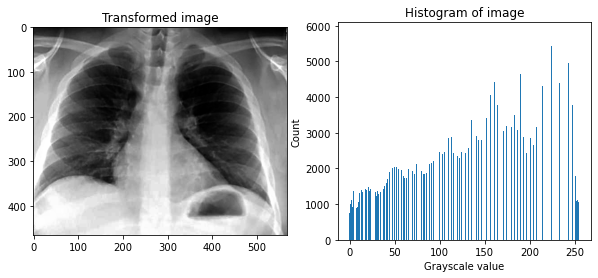

In [10]:
# ====== YOUR CODE: ======
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
trans_img = HistEq(chest_img)
plt.imshow(trans_img, cmap='gray')
plt.title('Transformed image')

plt.subplot(1,2,2)
hist_arr = ImHist_advanced(trans_img)
plt.bar(range(256), hist_arr)
plt.title('Histogram of image')
plt.xlabel('Grayscale value')
plt.ylabel('Count')

plt.show()
# ========================

9. Did you get a flat histogram after histogram equalization? Explain why yes or why not. 

**Answer:**

No, I did not get a flat histogram after histogram equalization. <br>
Histogram equalization stretches out the range of intensity in the image by remapping some intensity values to others. Thus, pixels with equal intensities will still have the same intensities, but not all intensities will have the same number of pixels.

10. Linear contrast stretching, histogram equalization, and CLAHE are all methods that aim to stretch out the intensity range. Explain the main differences between these methods and when one is preferred over the other.

**Answer:**

**Linear contrast stretching:** <br>
* Increases the difference between the maximum intensity value in an image and the minimum one. <br>
    All the rest of the intensity values are spread out between this range.
* Shape of histogram remains same.
* The original image can be restored.
* Used to enhance contrast.


<br>

**Histogram equalization:** <br>
* Tries to flatten the histogram to uniform distribution under the assumption that this is the best image quality.
* Shape of the histogram changes.
* Uses probability distribution.
* The original image cannot be restored.
* Used to enhance contrast.

<br>

**Contrast limited adaptive histogram equalization (CLAHE)** <br>
* Divides the image to small blocks and applies histogram equalization on each block.
* Used to improve the visibility level of foggy image.


---

###  Exercise 2

1. Implement the function `Conv2D` that takes in an image a filter in the form of 2D numpy arrays and returns the convolution product of the two arrays such that the output will have the same shape as the input image. <br>
    You can assume that the image class is uint8 and the filter's shape is (k,k).<br>
    
     Write a description of your function and explain its inputs and output.


In [11]:
def Conv2D(img: np.array, kernel: np.ndarray)-> np.ndarray:
    '''
    The function takes in an image and a filter and returns the convolution product of the image and the filter
    by moving the kernel accros the image.
    
    :param img: uint8 numpy array of an image 
    :param kernel: numpy array of a 2D filter with a (k,k) shape 
    :returm conv_img: numpy array of the convolution product (mode='same') of the image and the filter
    ''' 

    # ====== YOUR CODE: ======
    kernel = np.flipud(np.fliplr(kernel))
    k = kernel.shape[0]    
    img_rows, img_cols = img.shape
    diff = int(np.floor(k/2))
    
    padded_img = np.zeros([img_rows+2*diff, img_cols+2*diff])
    padded_img[diff:-diff, diff:-diff] = img
    
    conv_img = np.zeros_like(img)
    i = 0 
    
    while i < img_rows:
        j = 0
        while j < img_cols:
            conv_img[i][j] = np.sum(kernel*padded_img[i:i+k, j:j+k])
            j += 1
        i +=1
            
    # ========================
    return conv_img

2.  Load the image 'retina_noisy.jpg' and apply 3X3 mean filter.<br>
    Display in one figure the original image, the filtered image and the difference between them. Add titels. 

Text(0.5, 1.0, 'The difference between images')

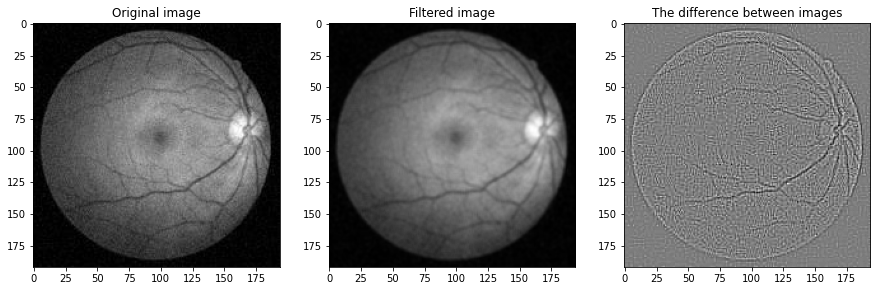

In [12]:
# ====== YOUR CODE: ======
n=3
noisy_img = plt.imread('retina_noisy.jpg')
mean_filter = np.ones((n, n))* 1/ n**2
conv = Conv2D(noisy_img, mean_filter)

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(noisy_img, cmap='gray')
plt.title('Original image')

plt.subplot(1,3,2)
plt.imshow(conv, cmap='gray')
plt.title('Filtered image')

plt.subplot(1,3,3)
plt.imshow(noisy_img.astype(int)-conv, cmap='gray')
plt.title('The difference between images')
# ========================

3. What kind of noise would **not** be optimally filtered by a Gaussian or a bilateral filter and especially if the range variance parameter is low? how would you filter this noise?

**Answer:**

Salt-and-Pepper noise (random white and black pixels) would not be optimally filtered by a Gaussian or a bilateral filter with low range variance parameter. Those filters will not filter this noise well because they are sensetive to outliers, as opposite to median filter, which I will choose to filter this noise.

4. **Bonus:** (10 points)

    Another way to calculate the convolution product between an image and kernal is shifting the image instead of moving the kernel accros the image. 
Implemet the function `Conv2D_shift_img` that takes in an image a filter in the form of 2D numpy arrays and returns the convolution product according to the above method.<br> 
The output should have the same shape as the input image.<br>
You can assume that the image class is uint8 and the filter's shape is (k,k).


In [13]:
def Conv2D_shift_img(img: np.array, kernel: np.ndarray)-> np.ndarray:
    '''
    The function takes in an image and a filter and returns the convolution product of the image and the filter 
    by shifting the image.
    
    :param img: uint8 numpy array of an image 
    :param kernel: numpy array of a 2D filter with a (k,k) shape 
    :returm conv_img: numpy array of the convolution product (mode='same') of the image and the filter  
    ''' 

    # ====== YOUR CODE: ======
    # FFT?
    # metrix-metrix multiplication? (tutorial 2)
    

    # ========================
    return conv_img

---

###  Exercise 3

1. Implement the function `BilateralKernel` that takes in a region of an image and outputs the value of its central pixel after filtering by a bilateral filter.<br>
    All images should be in an 8-bit format.<br>
     Write a description of your function and explain its inputs and output.

In [14]:
def BilateralKernel(region, spatial_std, range_std):
    
    '''
    The function takes in a region of an image and returns the value of its central pixel after 
    filtering by a bilateral filter.
    
    :param region: uint8 numpy array of a region of an image
    :param spatial_std: parameter controlling the fall-off of weights in spatial domain
    :param range_std: parameter controlling the fall-off of weights in intensity domain
    :returm filtered_pixel: the value of the region's central pixel after filtering by a bilateral filter  
    ''' 

    # ====== YOUR CODE: ======
#     print(region)
    kernel_rows, kernel_cols = region.shape
    central_pixel = [int(kernel_rows/2), int(kernel_cols/2)]

    filtered_pixel = 0
    w_p = 0
    
    for i in range(kernel_rows):
        for j in range(kernel_cols):
            
            s_dist = (central_pixel[0]-i)**2 + (central_pixel[1]-j)**2
            r_dist = (region[central_pixel[0], central_pixel[1]] - region[i, j])**2
            
            w_s = np.exp(-0.5*s_dist/spatial_std**2)
            w_r = np.exp(-0.5*r_dist/range_std**2)
            w = w_s*w_r
            w_p += w
            
            filtered_pixel += w*region[i, j]
    # ========================
    filtered_pixel = int(filtered_pixel/w_p)
    return filtered_pixel




2. Implement the function `BilateralFilter` that takes in an image and performs bilateral filtering on it.<br>
    All images should be in an 8-bit format.<br>
    Set default values for the arguments kernel_size, range_std and spatial_std.<br>
    Write a description of your function and explain its inputs and output.

In [15]:
def BilateralFilter(img, kernel_size=3, range_std=3, spatial_std=3):
    '''
    Add your description and complete the inputs (params) and output (return).
    
    :param region: uint8 numpy array of an image
    :param kernel_size: number of rows (=columns) in the filter
    :param range_std: parameter controlling the fall-off of weights in intensity domain
    :param spatial_std: parameter controlling the fall-off of weights in spatial domain
    :returm filtered_img: uint8 numpy array of the image after bilateral filtering
    ''' 

    # ====== YOUR CODE: ======
    img_rows, img_cols = img.shape
    filtered_img = np.zeros_like(img)
    diff = int(np.floor(kernel_size/2))
    padded_img = np.zeros([img_rows+2*diff, img_cols+2*diff])
    padded_img[diff:-diff, diff:-diff] = img
    
    i = 0   
    while i < img_rows:
        j = 0
        while j < img_cols:
            filtered_img[i][j] = BilateralKernel(padded_img[i:i+kernel_size, j:j+kernel_size], spatial_std, range_std)
            j += 1
        i +=1
    
    # ========================
    
    return filtered_img.astype('uint8')

3. Apply Bilateral filter on the image 'retina_noisy'<br>
    Set the values of the range std and the spatial std to be 9 and the value of the kernel size according to the below note.  <br>
    Note: Bilateral filter is composed of two gaussian filters. As you know, most of the gaussian lies within three standard deviations away from the mean. <br>
    Display in one figure the original image, the filtered image and the difference between them. Add titels.


Text(0.5, 1.0, 'The difference between images')

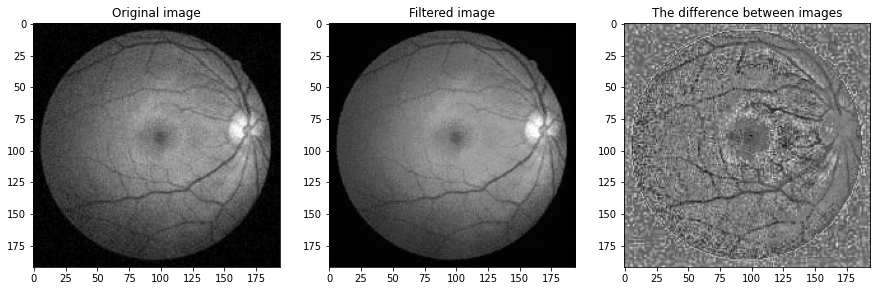

In [16]:
# ====== YOUR CODE: ======
kernel = 27
r_std=9
s_std=9

blf_img = BilateralFilter(noisy_img, kernel_size=kernel, range_std=r_std, spatial_std=s_std)

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(noisy_img, cmap='gray')
plt.title('Original image')

plt.subplot(1,3,2)
plt.imshow(blf_img, cmap='gray')
plt.title('Filtered image')

plt.subplot(1,3,3)
plt.imshow(noisy_img.astype(int)-blf_img, cmap='gray')
plt.title('The difference between images')

# ========================

4. Choose three different parameter spatial std and range_std values and show the filtered images (overall 9 images).<br>
    Display the images in a grid where the spatial std is constant along the rows and the range std is constant along the columns. Add titles to the images. <br>
    The kernel_radius value can remain the same as in the previous section.

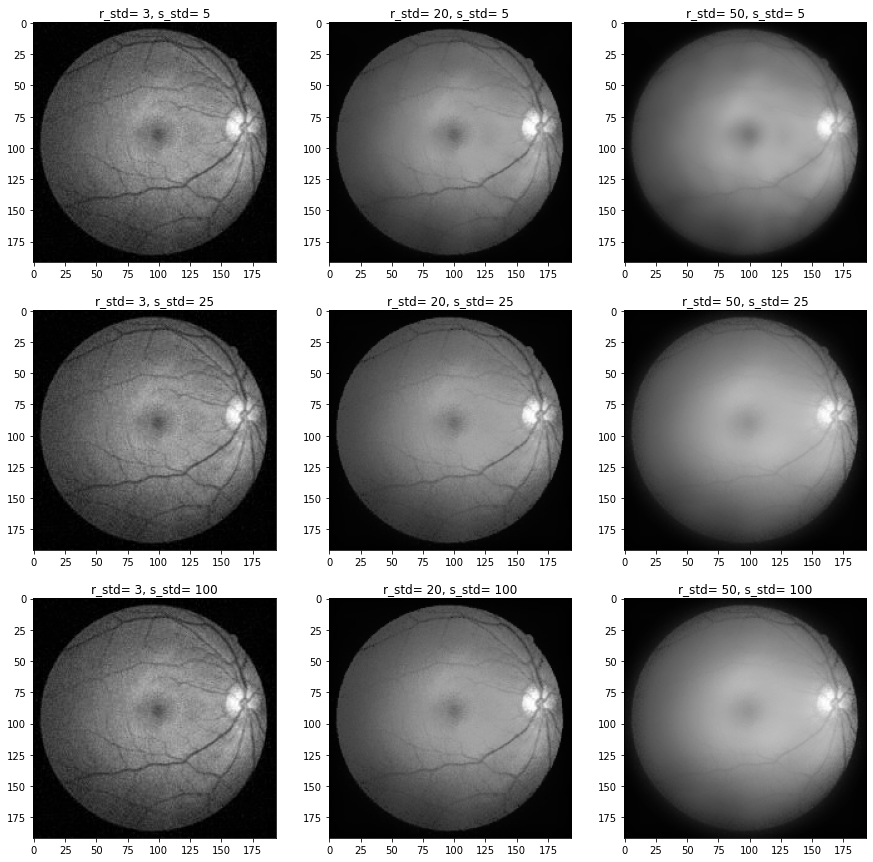

In [17]:
# ====== YOUR CODE: ======
r_std = [3, 20, 50]
s_std = [5, 25, 100]
kernel = 27

fig, axs = plt.subplots(3, 3)
fig.set_size_inches(15, 15)

for i, r in enumerate(r_std):
    for j, s in enumerate(s_std):
        blf_img = BilateralFilter(noisy_img, kernel_size=kernel, range_std=r, spatial_std=s)
        axs[j, i].imshow(blf_img, cmap='gray')
        axs[j, i].set_title(f'r_std= {r}, s_std= {s}')

plt.show()
# ========================

5. What are the benefits of using a bilateral filter instead of a Gaussian filter?

**Answer:**

Gaussian filter smoothing the image and reducing it's noise, while bilateral filter also preserving edges in addition to smoothing the image and reducing the noise.

Have a good day :)